# 🔥 Mapping Wildfire Burn Severity with LeafMap & Python

Welcome to this hands-on mapping activity! In this notebook, you'll explore satellite imagery, calculate wildfire burn severity, and create your own interactive web map using open-source geospatial tools.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/asivitskis/EarthInquiryLab/blob/main/1%20-%20Burn%20Severity%20Mapping%20with%20LeafMap/Wildfire_Burn_Severity_Mapping.ipynb)

## Learning Goals

By the end of this notebook, you will be able to:
- Understand and calculate the Normalized Burn Ratio (dNBR)
- Visualize burn severity using satellite imagery
- Interpret changes in vegetation using NIR/SWIR bands
- Use interactive maps to explore geographic data

## 🧰 1. Setup: Install and Import Packages

In [ ]:
# If running in Colab, uncomment these:
# !pip install leafmap rasterio geopandas rioxarray localtileserver

import leafmap
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
import rioxarray
import xarray as xr

## 🗺️ 2. Load and Visualize Satellite Imagery

We've prepared pre- and post-fire Landsat imagery for you. These files are hosted online for easy access.

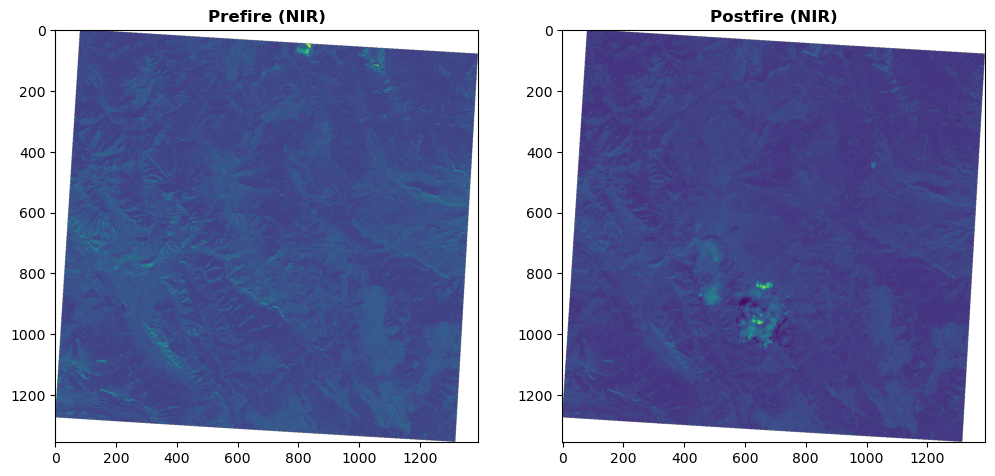

In [5]:
# Image Paths
prefire_path = "https://github.com/asivitskis/EarthInquiryLab/raw/refs/heads/main/data/prefire_LC08_038030_20230925_utm13n.tif"
postfire_path = "https://github.com/asivitskis/EarthInquiryLab/raw/refs/heads/main/data/postfire_LC08_038030_20241013_utm13n.tif"

# Load the images
prefire = rasterio.open(prefire_path)
postfire = rasterio.open(postfire_path)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
show(prefire.read(4), ax=ax1, title="Prefire (NIR)")
show(postfire.read(4), ax=ax2, title="Postfire (NIR)")
plt.show()

## 🔬 3. Calculate Burn Severity (dNBR)

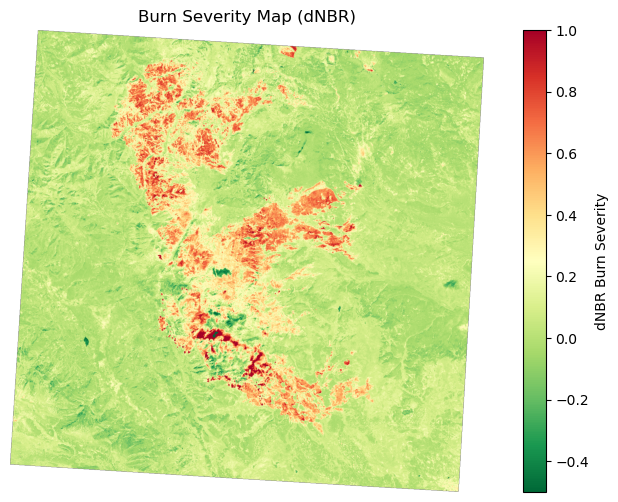

In [6]:
# Read and convert to float for division
nir_pre = prefire.read(5).astype('float32')    # SR_B5 (NIR)
swir_pre = prefire.read(7).astype('float32')   # SR_B7 (SWIR2)

nir_post = postfire.read(5).astype('float32')
swir_post = postfire.read(7).astype('float32')

# Avoid divide-by-zero by setting invalid denominators to NaN
nbr_pre = (nir_pre - swir_pre) / (nir_pre + swir_pre)
nbr_pre[np.isinf(nbr_pre)] = np.nan

nbr_post = (nir_post - swir_post) / (nir_post + swir_post)
nbr_post[np.isinf(nbr_post)] = np.nan

# Calculate dNBR
dnbr = nbr_pre - nbr_post

# Plotting
import matplotlib.pyplot as plt

dnbr_masked = np.ma.masked_invalid(dnbr)
plt.figure(figsize=(10, 6))
plt.imshow(dnbr_masked, cmap='RdYlGn_r', vmin=-0.5, vmax=1)
plt.colorbar(label='dNBR Burn Severity')
plt.title("Burn Severity Map (dNBR)")
plt.axis('off')
plt.show()


❓ What do you think a high dNBR value indicates?
❓ Why do we use NIR and SWIR bands to analyze burn severity?

## 🌍 4. Create Your Interactive Map

Use LeafMap to create and customize your interactive wildfire map.

In [ ]:
# Ensure we mask invalid values (NaNs) beforehand
dnbr = np.ma.masked_invalid(dnbr)

# Convert to xarray DataArray with CRS and spatial metadata
dnbr_da = xr.DataArray(
    dnbr,
    dims=("y", "x"),
    coords={
        "y": prefire.xy(0, 0)[1] - np.arange(dnbr.shape[0]) * prefire.res[1],
        "x": prefire.xy(0, 0)[0] + np.arange(dnbr.shape[1]) * prefire.res[0],
    },
    name="dnbr"
)

dnbr_da.rio.write_crs(prefire.crs, inplace=True)

import ipywidgets as widgets

# Create the map and add the raster as before
m = leafmap.Map(center=[43.0, -109.0], zoom=8)
m.add_raster(
    dnbr_da,
    colormap='RdYlGn_r',
    layer_name='Burn Severity',
    vmin=-0.5,
    vmax=1,
    nodata=np.nan,
)

m


Map(center=[43.592339499999994, -110.0820925], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoo…

## 🧠 5. Reflection

- What do you notice about the areas with high burn severity?
- Did you add a personal location to your map? Why did you choose it?
- What story does your map tell?

## 🧭 6. Try It Yourself!

Choose one of the following:
- Add another layer to your map (elevation, land cover)
- Change the marker popup to share a short story
- Download your map as HTML or PNG

> Bonus: What other local issue could you explore with this tool?

🏁 **Great job! You’ve just used real remote sensing data to analyze wildfire impacts and tell a story with maps.**
